In [1]:
import warnings
warnings.filterwarnings("ignore")

import math
import numpy as np
import pylab as plt
%matplotlib inline
import seaborn as sns

from matplotlib import pyplot as plt
from random import random
from sympy import Symbol, maximum
from sympy.sets import Interval

# Задание 1

In [46]:
xy = []
color = []

def computation_Pi(r, ExpNmb):
    global xy, color
    xy, color = [], []
    m = 0
    for i in range(ExpNmb):
        xp, yp = [np.random.uniform(-r, r) for _ in range(2)]
        if xp**2 + yp**2 < r**2:
            color.append('r')
            m += 1
        else:
            color.append('b')
        xy.append((xp, yp))
    return 4*m/ExpNmb

# Задание 2

Дополнительно реализована визуализация на графиках

Text(0.5, 1.0, '$n=10^{6}$')

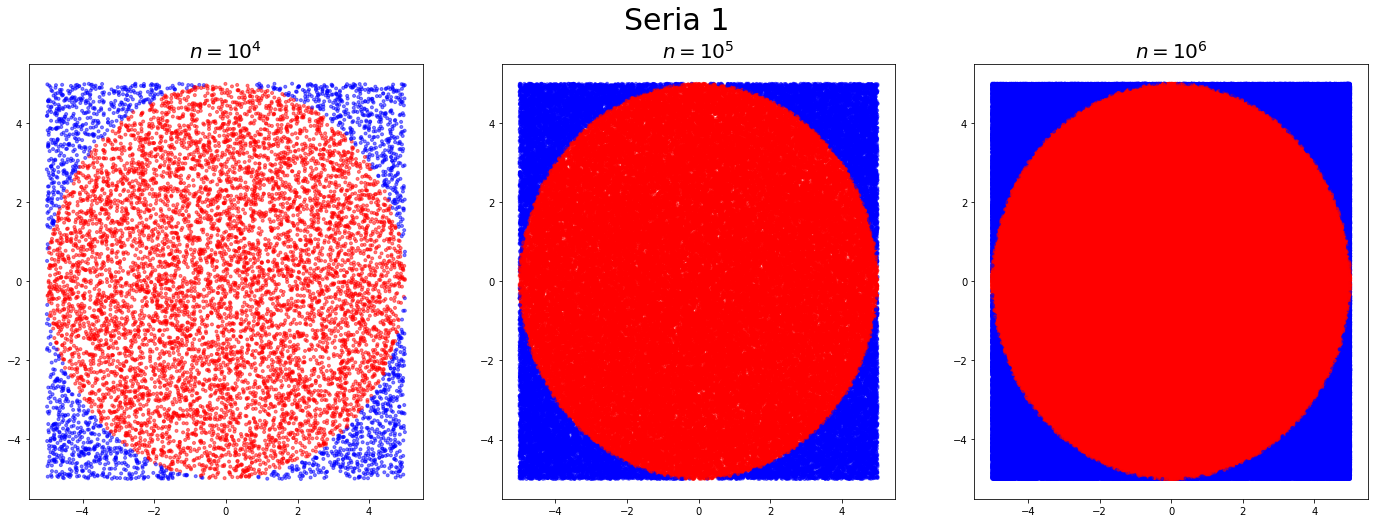

In [49]:
r = 5
fig, axes = plt.subplots(1, 3, figsize=(24, 8))
Seria_1 = []
for i in range(3):
    Seria_1.append(computation_Pi(r, 10**(4+i)))
    axes[i].scatter([x[0] for x in xy], [y[1] for y in xy], color=[c for c in color], marker='.', alpha=0.5)
Seria_1.append(computation_Pi(r, 10**(7)))
               
fig.suptitle('Seria 1', fontsize = 30)
axes[0].set_title(r"$n=10^{4}$", fontsize = 20)
axes[1].set_title(r"$n=10^{5}$", fontsize = 20)
axes[2].set_title(r"$n=10^{6}$", fontsize = 20)

Text(0.5, 1.0, '$n=10^{7}$')

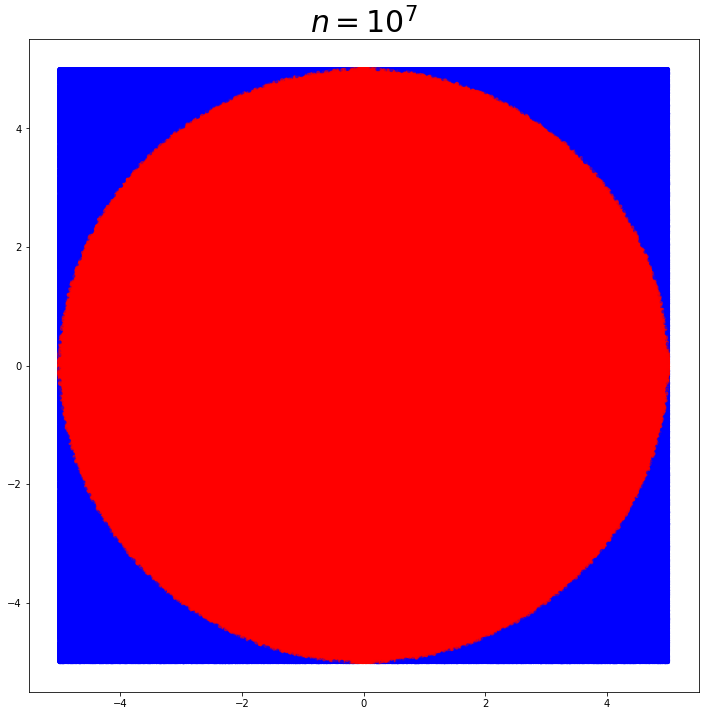

In [56]:
plt.figure(figsize=(12, 12))
plt.scatter([x[0] for x in xy], [y[1] for y in xy], color=[c for c in color], marker='.', alpha=0.5)
plt.title(r"$n=10^{7}$", fontsize=30)

Text(0.5, 1.0, '$n=10^{6}$')

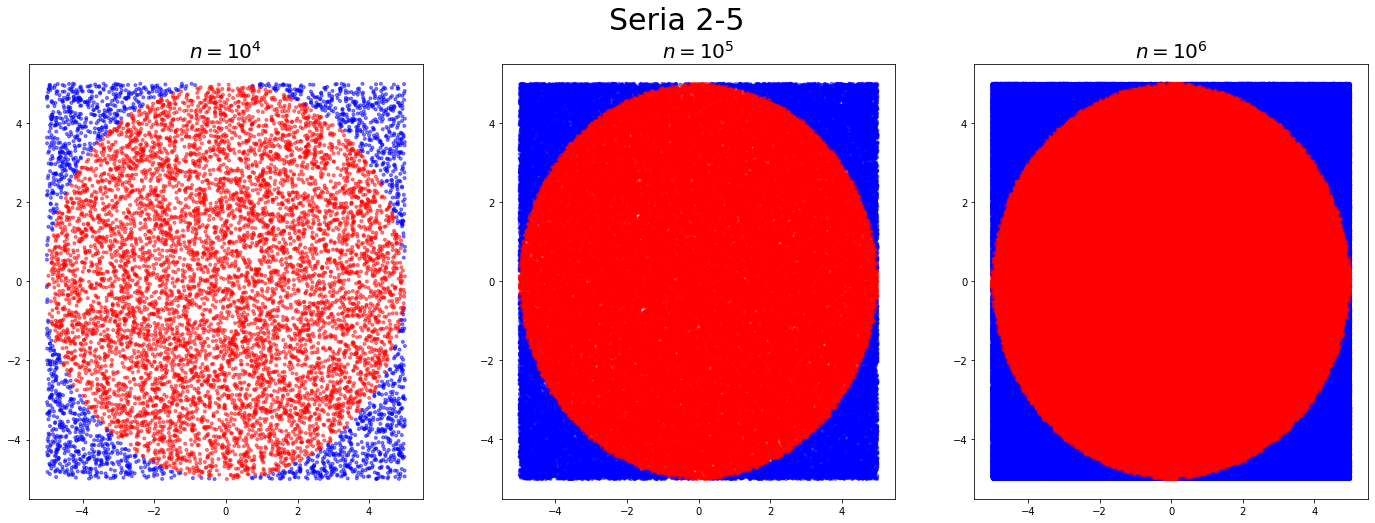

In [50]:
fig, axes = plt.subplots(1, 3, figsize=(24, 8))
Seria = []
for i in range(3):
    Seria.append(computation_Pi(r, 10**(4+i)))
    axes[i].scatter([x[0] for x in xy], [y[1] for y in xy], color=[c for c in color], marker='.', alpha=0.5)
Seria_2, Seria_3, Seria_4, Seria_5 = Seria[0], Seria[1], Seria[2], computation_Pi(r, 10**(7))
               
fig.suptitle('Seria 2-5', fontsize = 30)
axes[0].set_title(r"$n=10^{4}$", fontsize = 20)
axes[1].set_title(r"$n=10^{5}$", fontsize = 20)
axes[2].set_title(r"$n=10^{6}$", fontsize = 20)

# Задание 3

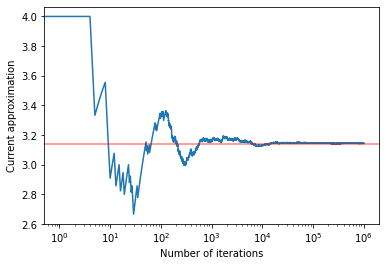

In [66]:
N = 10**6
m = 0
value = np.empty(N)
for i in range(N):
    xp, yp = [np.random.uniform(-r, r) for _ in range(2)]
    if xp**2 + yp**2 < r**2:
        m += 1
    value[i] = 4*m/float(i+1)
plt.semilogx(value)
plt.xlabel("Number of iterations")
plt.ylabel("Current approximation")
plt.axhline(np.pi, color="r", alpha=0.5)

In [71]:
fault_1 = [abs(np.pi - x) for x in Seria_1]
fault_2 = [abs(np.pi - x) for x in [Seria_2, Seria_3, Seria_4, Seria_5]]

In [76]:
print('Погрешности первой серии:', fault_1, '\nПогрешности 2-5 серий:', fault_2)

Погрешности первой серии: [0.0060073464102070595, 0.0051673464102068856, 0.002123346410206839, 0.0003313464102068231] Погрешности 2-5 серий: [0.023592653589793233, 0.00015265358979332788, 0.0008793464102070381, 2.785358979329189e-05]


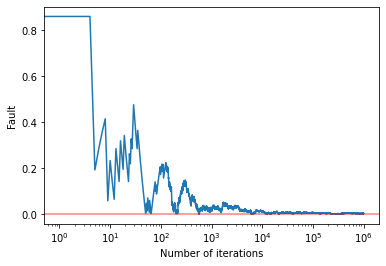

In [78]:
fault_3 = [abs(np.pi - x) for x in value]
plt.semilogx(fault_3)
plt.xlabel("Number of iterations")
plt.ylabel("Fault")
plt.axhline(0, color="r", alpha=0.5)

In [83]:
fault_mean = abs(np.mean(Seria_1 + [Seria_2, Seria_3, Seria_4, Seria_5]) - np.pi) 
print('Погрешность среднего значения для серий:', fault_mean)

Погрешность среднего значения: 0.001158053589793262


In [86]:
fault_mean_value = abs(np.mean(value) - np.pi) 
print('Погрешность среднего значения от 1 до миллона экспериментов:', fault_mean_value)

Погрешность среднего значения от 1 до миллона экспериментов: 0.0031780519070587765


# 4 задание

In [92]:
xy = []
color = []

def y_max():
    x = Symbol('x')
    func = x**3 + 1
    interv = Interval(0, 2)
    return float(maximum(func, x, interv))

def computation_integral(a, b, y, func, ExpNmb):
    global xy, color
    xy, color = [], []
    m = 0
    for i in range(ExpNmb):
        xp = (b - a) * random() + a
        yp = y * random()
        if yp < func(xp):
            color.append('r')
            m += 1
        else:
            color.append('b')
        xy.append((xp, yp))
    return (b-a)*y * m/ExpNmb

def graphix(axes):
    axes.scatter([x[0] for x in xy], [y[1] for y in xy], color=[c for c in color], marker='.', alpha=0.5)

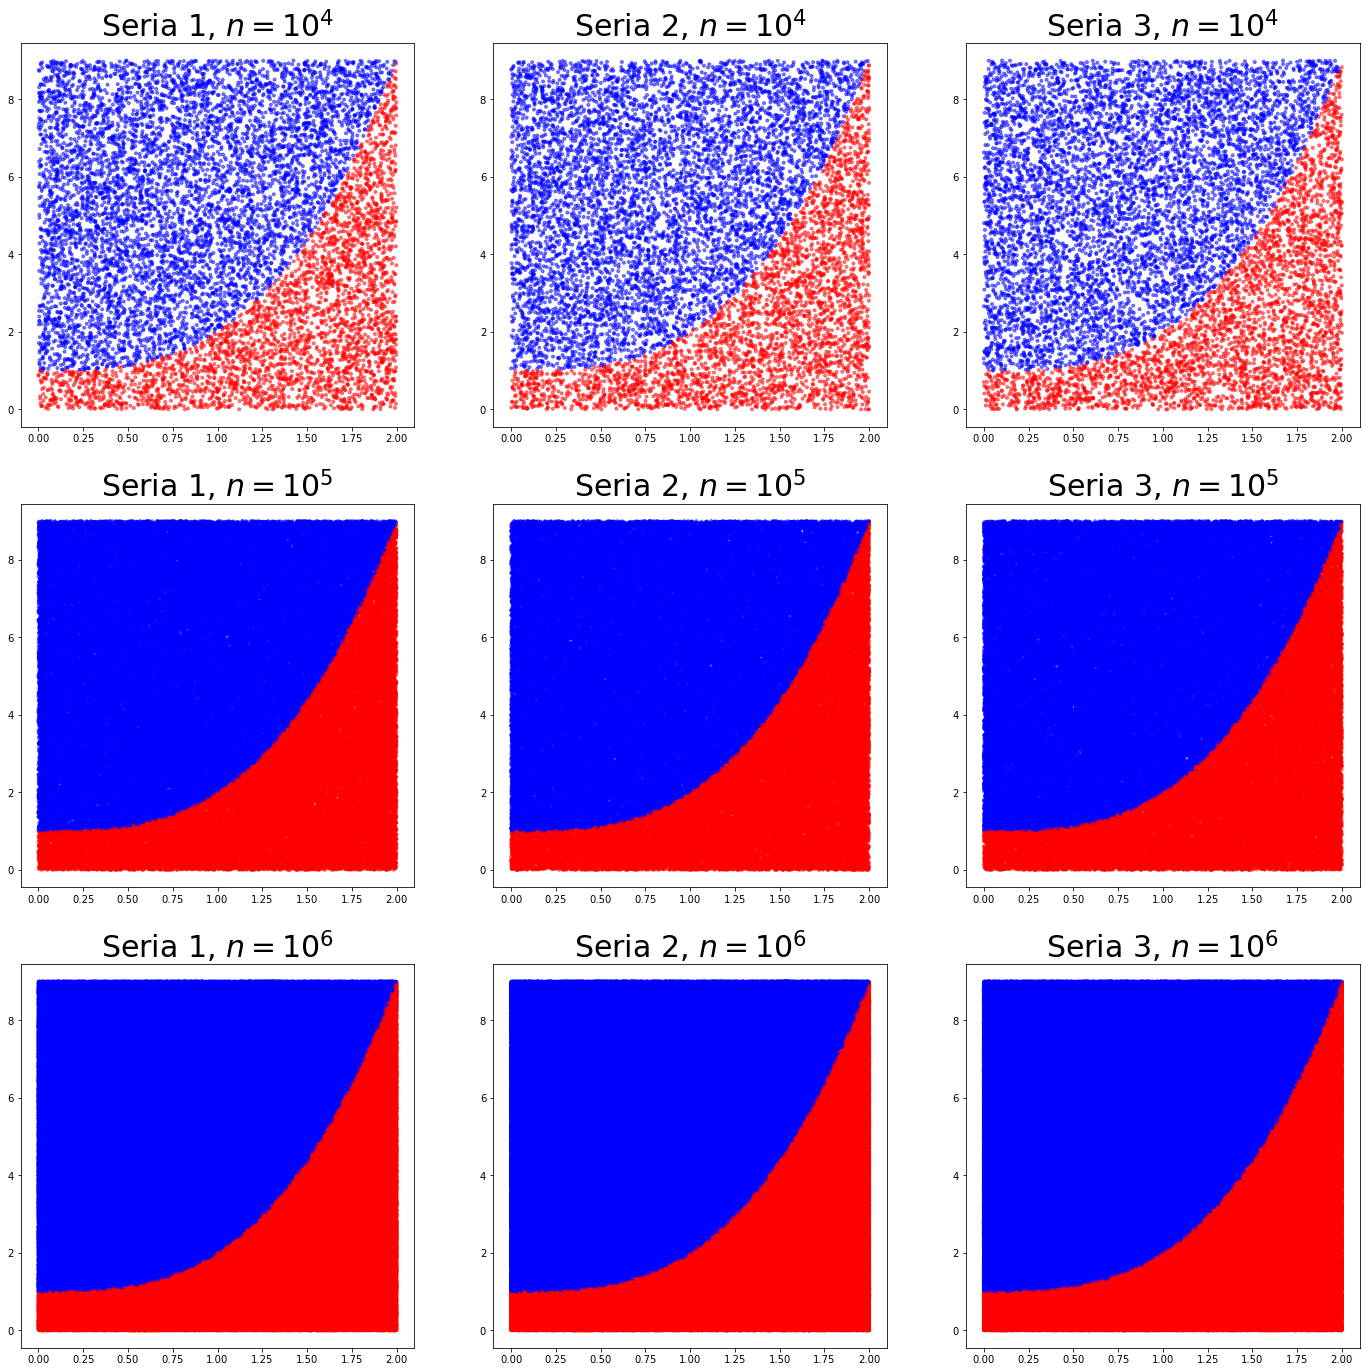

In [113]:
fig, axes = plt.subplots(3, 3, figsize=(24, 24))
y = y_max()
func = lambda x: x**3+1
Seria_1, Seria_2, Seria_3 = [], [], []
for i in range(3):
    S1, S2, S3 = [[computation_integral(0, 2, y, func, 10**(4+i)), 
                                  graphix(axes[i, x]),
                                 axes[i, x].set_title(r'Seria {}, $n=10^{}$'.format(x+1,4+i), fontsize=30)][0] \
                                 for x in range(3)]
    Seria_1.append(S1)
    Seria_2.append(S2)
    Seria_3.append(S3)

Text(0.5, 1.0, 'Seria 3, $n=10^{7}$')

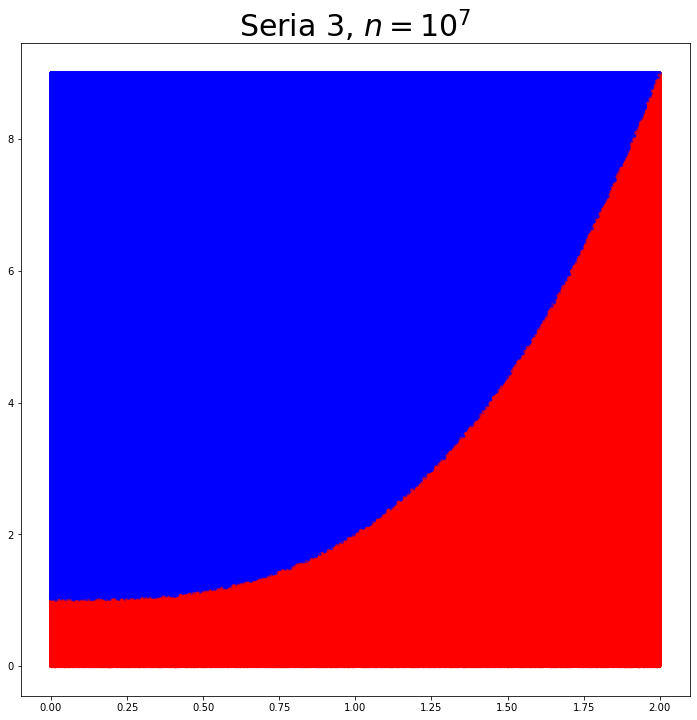

In [115]:
S1, S2, S3 = [computation_integral(0, 2, y, func, 10**7) for _ in range(3)]
Seria_1.append(S1)
Seria_2.append(S2)
Seria_3.append(S3)
              
plt.figure(figsize=(12, 12))
plt.scatter([x[0] for x in xy], [y[1] for y in xy], color=[c for c in color], marker='.', alpha=0.5)
plt.title(r"Seria 3, $n=10^{7}$", fontsize=30)

In [118]:
fault_mean_1, fault_mean_2, fault_mean_3 = [abs(np.mean(x) - 6) for x in [Seria_1, Seria_2, Seria_3]]
print('Погрешность первой серии:', fault_mean_1, 
      '\nПогрешность второй серии:', fault_mean_2,
     '\nПогрешность третьей серии:', fault_mean_3)

Погрешность первой серии: 0.006252449999999854 
Погрешность второй серии: 0.01732710000000015 
Погрешность третьей серии: 0.006344399999999695
